[*********************100%***********************]  4 of 4 completed


Tickers: ['AAPL', 'GOOG', 'MSFT', 'AMZN']

*Bestes Portfolio (max. Sharpe Ratio):
Gewichte:
AAPL    0.784190
GOOG    0.014166
MSFT    0.029693
AMZN    0.171951
Name: 19741, dtype: float64

Rendite: 0.34794283720929053
Volatilität: 0.29006708195088443
Sharpe Ratio: 1.1305758481923136 




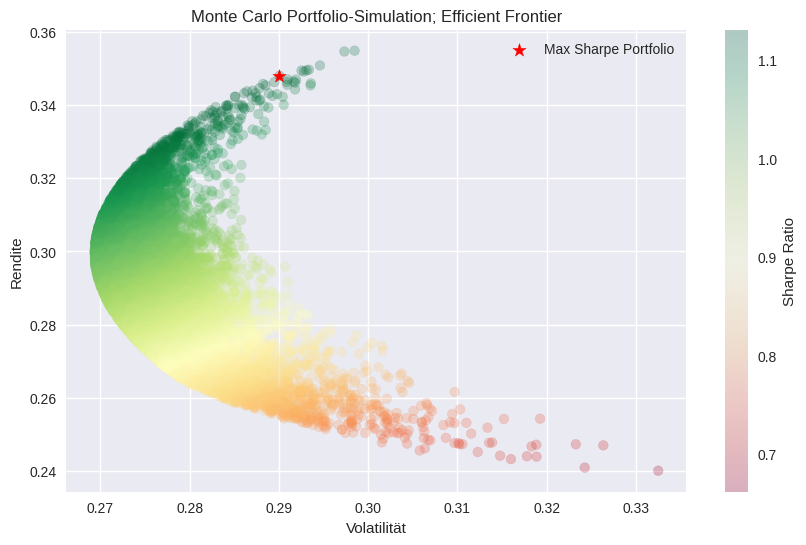

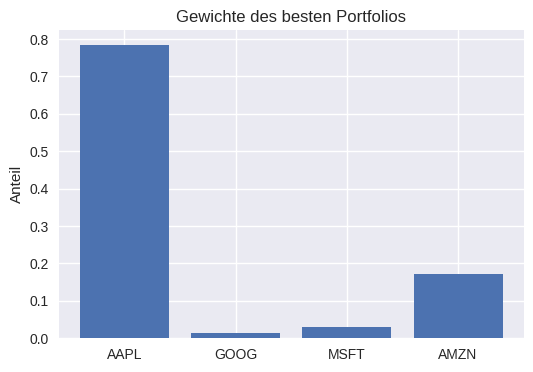

In [25]:
!pip install yfinance pandas numpy matplotlib seaborn

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Style Plots
plt.style.use("seaborn-v0_8")

tickers = ["AAPL", "GOOG", "MSFT", "AMZN"] #Beispielticker
data = yf.download(tickers, start="2019-01-01", end="2024-12-31", auto_adjust=True)

#Rendite
# Select only the 'Close' price data for returns calculation
returns = data['Close'].pct_change().dropna()
mean_returns = returns.mean() * 252 #annualisiert
cov_matrix = returns.cov() * 252

print("Tickers:", tickers)


#Monte Carlo Simulation

num_portfolios = 20000
results = np.zeros((3, num_portfolios))
weights_record = []

risk_free_rate = 0.02

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    #Kennzahlen
    portfolio_return = np.dot(weights, mean_returns)    #Rendite
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  #Volatiliät
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility   #Sharpe

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

results_df = pd.DataFrame(results.T, columns=["Rendite", "Volatilität", "Sharpe Ratio"])
weights_df = pd.DataFrame(weights_record, columns=tickers)

#Winner Portfolio
max_sharpe_idx = results_df["Sharpe Ratio"].idxmax()
max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
max_weights = weights_df.loc[max_sharpe_idx]

print("\n*Bestes Portfolio (max. Sharpe Ratio):")
print("Gewichte:\n", max_weights, sep='')
print("\nRendite:", max_sharpe_portfolio["Rendite"])
print("Volatilität:", max_sharpe_portfolio["Volatilität"])
print("Sharpe Ratio:", max_sharpe_portfolio["Sharpe Ratio"], "\n\n")


#Efficient Frontier

plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap="RdYlGn", alpha = 0.25)
plt.colorbar(label="Sharpe Ratio")
plt.title("Monte Carlo Portfolio-Simulation; Efficient Frontier")
plt.xlabel("Volatilität")
plt.ylabel("Rendite")

plt.scatter(max_sharpe_portfolio["Volatilität"], max_sharpe_portfolio["Rendite"], color="red", marker="*", s=100, label="Max Sharpe Portfolio")

plt.legend()
plt.show()

#Balkendiagramm Weights
print("\n\n")
plt.figure(figsize=(6, 4))
plt.bar(tickers, max_weights)
plt.title("Gewichte des besten Portfolios")
plt.ylabel("Anteil")
plt.show()